step 1. Download
[```roop.zip```](https://github.com/neuralfalcon/roop_colab/raw/main/roop.zip) (3.2MB)<br>
your folder Structure should look like this <br>
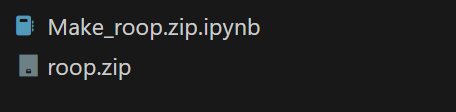

In [3]:
#@title Upload roop.zip
import os
import shutil
from zipfile import ZipFile
from tqdm import tqdm
import urllib
def extract_zip(zip_file_path,extract_path):
    # Create the extraction directory if it doesn't exist
    os.makedirs(extract_path, exist_ok=True)
    # Open the ZIP file
    with ZipFile(zip_file_path, 'r') as zip_ref:
        # Extract all contents to the specified directory
        zip_ref.extractall(extract_path)
    print(f"Contents of '{zip_file_path}' extracted to '{extract_path}'.")


def zip_folder(folder_path, zip_path):
    if os.path.exists(zip_path):
      os.remove(zip_path)
    with ZipFile(zip_path, 'w') as zipf:
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, folder_path)
                zipf.write(file_path, arcname=arcname)



def conditional_download(url, download_file_path):
    print(f"Downloading {os.path.basename(download_file_path)}")
    base_path = os.path.dirname(download_file_path)

    if not os.path.exists(base_path):
        os.makedirs(base_path)

    if os.path.exists(download_file_path):
        os.remove(download_file_path)

    try:
        request = urllib.request.urlopen(url)  # type: ignore[attr-defined]
        total = int(request.headers.get('Content-Length', 0))
    except urllib.error.URLError as e:
        print(f"Error: Unable to open the URL - {url}")
        print(f"Reason: {e.reason}")
        return

    with tqdm(total=total, desc='Downloading', unit='B', unit_scale=True, unit_divisor=1024) as progress:
        try:
            urllib.request.urlretrieve(url, download_file_path, reporthook=lambda count, block_size, total_size: progress.update(block_size))  # type: ignore[attr-defined]
        except urllib.error.URLError as e:
            print(f"Error: Failed to download the file from the URL - {url}")
            print(f"Reason: {e.reason}")
            return

    print(f"Download successful!")
    print(f"URL: {url}")
    print(f"Save at: {download_file_path}")


if os.path.exists("./roop"):
  shutil.rmtree("./roop")

roop_zip_path = './roop.zip'
if os.path.exists(roop_zip_path):
  print("roop.zip Already Exist")
  extract_zip("./roop.zip","./")
else:
  print("./roop.zip not Found Run This Cell Again")


roop.zip Already Exist
Contents of './roop.zip' extracted to './'.


In [4]:
inswapper_128 = 'https://huggingface.co/countfloyd/deepfake/resolve/main/inswapper_128.onnx'  # @param {type: "string"}
inswapper_128_fp16 = 'https://github.com/Hillobar/Rope/releases/download/Sapphire/inswapper_128.fp16.onnx'  # @param {type: "string"}
buffalo_l = 'https://github.com/deepinsight/insightface/releases/download/v0.7/buffalo_l.zip'  # @param {type: "string"}
GFPGANv1_4 = 'https://github.com/TencentARC/GFPGAN/releases/download/v1.3.4/GFPGANv1.4.pth'  # @param {type: "string"}
detection_Resnet50_Final = 'https://github.com/xinntao/facexlib/releases/download/v0.1.0/detection_Resnet50_Final.pth'  # @param {type: "string"}
parsing_parsenet = 'https://github.com/xinntao/facexlib/releases/download/v0.2.2/parsing_parsenet.pth'  # @param {type: "string"}
onnx_gpu_install = 'https://github.com/karaokenerds/python-audio-separator/releases/download/v0.12.1/onnxruntime_gpu-1.17.0-cp310-cp310-linux_x86_64.whl'  # @param {type: "string"}

# print("Downloading inswapper_128.onnx")

conditional_download(inswapper_128,"./roop/checkpoints/inswapper_128.onnx")
# print("Downloading inswapper_128.fp16.onnx")
conditional_download(inswapper_128_fp16,"./roop/checkpoints/inswapper_128.fp16.onnx")
# print("Downloading buffalo_l.zip")
conditional_download(buffalo_l,"./buffalo_l.zip")
extract_zip("./buffalo_l.zip","./roop/checkpoints/models/buffalo_l")
# print("Downloading GFPGANv1.4.pth")
conditional_download(GFPGANv1_4,"./roop/models/GFPGANv1.4.pth")
# print("Downloading detection_Resnet50_Final.pth")
conditional_download(detection_Resnet50_Final,"./roop/gfpgan/weights/detection_Resnet50_Final.pth")
# print("Downloading parsing_parsenet.pth")
conditional_download(parsing_parsenet,"./roop/gfpgan/weights/parsing_parsenet.pth")
conditional_download(onnx_gpu_install,"./roop/onnxruntime_gpu-1.17.0-cp310-cp310-linux_x86_64.whl")


folder_to_zip = './roop'
zip_file_path = './roop.zip'
zip_folder(folder_to_zip, zip_file_path)
print(f"New File save at: ./roop.zip")


Downloading: 529MB [06:04, 1.52MB/s]                               


Download successful!
URL: https://huggingface.co/countfloyd/deepfake/resolve/main/inswapper_128.onnx
Save at: ./roop/checkpoints/inswapper_128.onnx


Downloading: 264MB [02:58, 1.55MB/s]                               


Download successful!
URL: https://github.com/Hillobar/Rope/releases/download/Sapphire/inswapper_128.fp16.onnx
Save at: ./roop/checkpoints/inswapper_128.fp16.onnx


Downloading: 275MB [02:53, 1.66MB/s]                               


Download successful!
URL: https://github.com/deepinsight/insightface/releases/download/v0.7/buffalo_l.zip
Save at: ./buffalo_l.zip
Contents of './buffalo_l.zip' extracted to './roop/checkpoints/models/buffalo_l'.


Downloading: 332MB [04:35, 1.27MB/s]                               


Download successful!
URL: https://github.com/TencentARC/GFPGAN/releases/download/v1.3.4/GFPGANv1.4.pth
Save at: ./roop/models/GFPGANv1.4.pth


Downloading: 104MB [01:41, 1.08MB/s]                              


Download successful!
URL: https://github.com/xinntao/facexlib/releases/download/v0.1.0/detection_Resnet50_Final.pth
Save at: ./roop/gfpgan/weights/detection_Resnet50_Final.pth


Downloading: 81.4MB [01:14, 1.14MB/s]                              


Download successful!
URL: https://github.com/xinntao/facexlib/releases/download/v0.2.2/parsing_parsenet.pth
Save at: ./roop/gfpgan/weights/parsing_parsenet.pth


Downloading: 164MB [02:25, 1.18MB/s]                               


Download successful!
URL: https://github.com/karaokenerds/python-audio-separator/releases/download/v0.12.1/onnxruntime_gpu-1.17.0-cp310-cp310-linux_x86_64.whl
Save at: ./roop/onnxruntime_gpu-1.17.0-cp310-cp310-linux_x86_64.whl
New File save at: ./roop.zip
